## IMPORTING NECESSARY LIBRARIES

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings
from keras.applications import inception_v3
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input as inception_v3_preprocessor
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras import layers, Input
from keras.layers import InputLayer, MaxPooling2D, Flatten, Dense, Conv2D, Dropout, AveragePooling2D, Concatenate, concatenate
from keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions, ResNet50
from tensorflow.keras.optimizers import Adam, SGD
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import cv2
from skimage import io
import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
import tensorflow.keras.backend as K
import random
import glob
from sklearn.preprocessing import StandardScaler, normalize
from IPython.display import display

## DATA VISUALIZATION

In [2]:
labels = ['glioma_tumor','meningioma_tumor','pituitary_tumor','no_tumor']

## TRAIN AND TEST SPLIT

In [3]:
X_train = []
y_train = []
image_size = 128
for i in labels:
    folderPath = os.path.join('../input/brain-tumor-classification-mri','Training',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('../input/brain-tumor-classification-mri','Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)
        
X_train = np.array(X_train)
y_train = np.array(y_train)

100%|██████████| 105/105 [00:00<00:00, 160.86it/s]


In [4]:
!pip install openpyxl
df = pd.read_excel("../input/index-data/combindex.xlsx")
X_train = []
X_train_path = list(df['image_path'])
y_train = list(df['tumor_type'])       
image_size = 128
for i in X_train_path:
    img = cv2.imread(i)
    img = cv2.resize(img,(image_size,image_size))
    X_train.append(img)

X_train = np.array(X_train)
y_train = np.array(y_train)

     |████████████████████████████████| 242 kB 908 kB/s 


In [5]:
X_train, y_train = shuffle(X_train,y_train)

In [6]:
X_train.shape

(5834, 128, 128, 3)

## COUNTPLOT

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

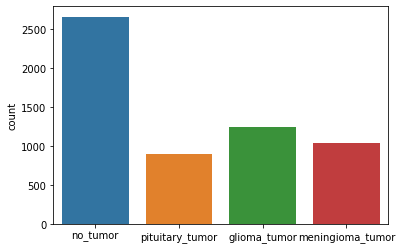

In [7]:
sns.countplot(y_train)

In [8]:
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True)

datagen.fit(X_train)
X_train.shape

(5834, 128, 128, 3)

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

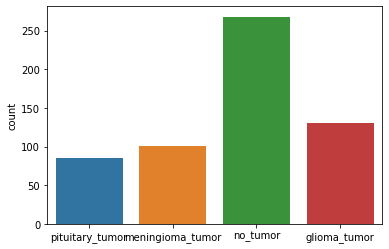

In [10]:
sns.countplot(y_test)

In [11]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

## TRAIN SAMPLE

/opt/conda/lib/python3.7/site-packages/matplotlib/text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


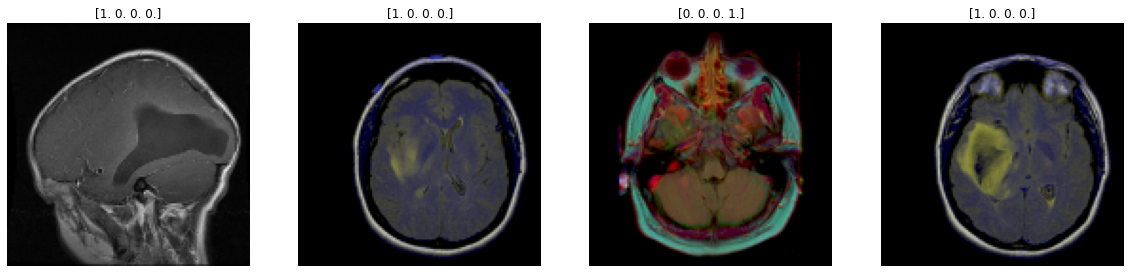

In [12]:
fig, ax = plt.subplots(1,4, figsize=(20,20))
k = 0
for i in range(0,4):
    if i==0: idx=0
    elif i==1: idx=827
    elif i==2: idx=1649
    else: idx=2045
    ax[k].imshow(X_train[idx])
    ax[k].set_title(y_train[idx])
    ax[k].axis('off')
    k+=1

## MODEL CONSTRUCTION

In [13]:
base_model = InceptionV3(weights = 'imagenet', include_top = False, input_shape=(image_size,image_size,3))

2021-11-10 16:45:59.617313: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-10 16:45:59.715973: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-10 16:45:59.716696: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-10 16:45:59.717931: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

87924736/87910968 [==============================] - 1s 0us/step


In [14]:
merged_1 = concatenate([base_model.get_layer('mixed4').output,base_model.get_layer('mixed5').output,base_model.get_layer('mixed6').output,base_model.get_layer('mixed7').output])
merged_2 = concatenate([base_model.get_layer('mixed9').output,base_model.get_layer('mixed10').output])

In [15]:
model_1_pool = AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='same')(merged_1)
model_1_dropout = Dropout(0.2)(model_1_pool)
model_1_flatten = Flatten()(model_1_dropout)
model_1_final = Dense(256, activation="sigmoid")(model_1_flatten)

In [16]:
model_2_pool = AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='same')(base_model.get_layer('mixed8').output)
model_2_dropout = Dropout(0.2)(model_2_pool)
model_2_flatten = Flatten()(model_2_dropout)
model_2_final = Dense(256, activation="sigmoid")(model_2_flatten)

In [17]:
model_3_pool = AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='same')(merged_2)
model_3_dropout = Dropout(0.2)(model_3_pool)
model_3_flatten = Flatten()(model_3_dropout)
model_3_final = Dense(256, activation="sigmoid")(model_3_flatten)

In [18]:
merged = concatenate([model_1_final,model_2_final,model_3_final])
merged_dense = Dense(256, activation="sigmoid")(merged)
result = Dense(4, activation=tf.nn.softmax)(merged_dense)
model = Model(inputs=base_model.input,outputs=result)

In [19]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 63, 63, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 63, 63, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 63, 63, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

## MODEL COMPILATION AND FITTING

In [20]:
model.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])

In [21]:
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("custom.h5",monitor="accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.4, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=0)

2021-11-10 16:46:07.439186: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-11-10 16:46:07.439232: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-11-10 16:46:07.441410: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1614] Profiler found 1 GPUs
2021-11-10 16:46:07.624058: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-11-10 16:46:07.624302: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


In [22]:
history = model.fit(X_train,y_train,validation_split=0.1, epochs =25, verbose=1, batch_size=32,
                   callbacks=[tensorboard,checkpoint,reduce_lr])

2021-11-10 16:46:08.582689: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25


2021-11-10 16:46:15.310337: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


  1/148 [..............................] - ETA: 31:12 - loss: 1.4057 - accuracy: 0.3750

2021-11-10 16:46:21.775902: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-11-10 16:46:21.775965: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


  2/148 [..............................] - ETA: 1:53 - loss: 1.4668 - accuracy: 0.3906 

2021-11-10 16:46:22.159937: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-11-10 16:46:22.163671: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed
2021-11-10 16:46:22.318533: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 2133 callback api events and 2130 activity events. 
2021-11-10 16:46:22.374769: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-11-10 16:46:22.436770: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/train/plugins/profile/2021_11_10_16_46_22

2021-11-10 16:46:22.472501: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2021_11_10_16_46_22/9e5d00f632ed.trace.json.gz
2021-11-10 16:46:22.553547: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/train/pl

148/148 [==============================] - 29s 108ms/step - loss: 0.4901 - accuracy: 0.8212 - val_loss: 2.8714 - val_accuracy: 0.4629

Epoch 00001: accuracy improved from -inf to 0.82116, saving model to custom.h5
Epoch 2/25
148/148 [==============================] - 12s 83ms/step - loss: 0.2681 - accuracy: 0.9098 - val_loss: 0.3938 - val_accuracy: 0.8667

Epoch 00002: accuracy improved from 0.82116 to 0.90984, saving model to custom.h5
Epoch 3/25
148/148 [==============================] - 12s 82ms/step - loss: 0.2140 - accuracy: 0.9287 - val_loss: 2.2826 - val_accuracy: 0.5390

Epoch 00003: accuracy improved from 0.90984 to 0.92868, saving model to custom.h5
Epoch 4/25
148/148 [==============================] - 12s 80ms/step - loss: 0.1552 - accuracy: 0.9465 - val_loss: 0.6450 - val_accuracy: 0.8495

Epoch 00004: accuracy improved from 0.92868 to 0.94646, saving model to custom.h5
Epoch 5/25
148/148 [==============================] - 12s 81ms/step - loss: 0.0749 - accuracy: 0.9757 - v

## MODEL ANALYSIS

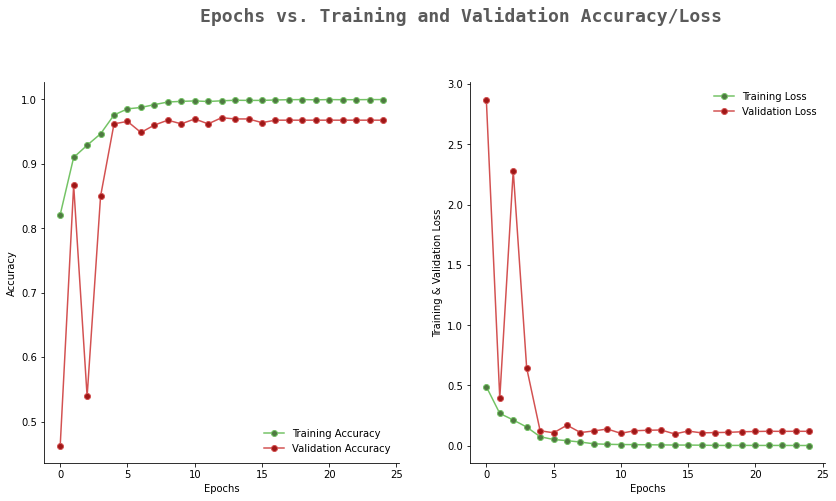

In [23]:
filterwarnings('ignore')
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

epochs = [i for i in range(25)]
fig, ax = plt.subplots(1,2,figsize=(14,7))
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

fig.text(s='Epochs vs. Training and Validation Accuracy/Loss',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=1,x=0.28,alpha=0.8)

sns.despine()
ax[0].plot(epochs, train_acc, marker='o',markerfacecolor=colors_green[2],color=colors_green[3],
           label = 'Training Accuracy')
ax[0].plot(epochs, val_acc, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],
           label = 'Validation Accuracy')
ax[0].legend(frameon=False)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

sns.despine()
ax[1].plot(epochs, train_loss, marker='o',markerfacecolor=colors_green[2],color=colors_green[3],
           label ='Training Loss')
ax[1].plot(epochs, val_loss, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],
           label = 'Validation Loss')
ax[1].legend(frameon=False)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training & Validation Loss')

fig.show()

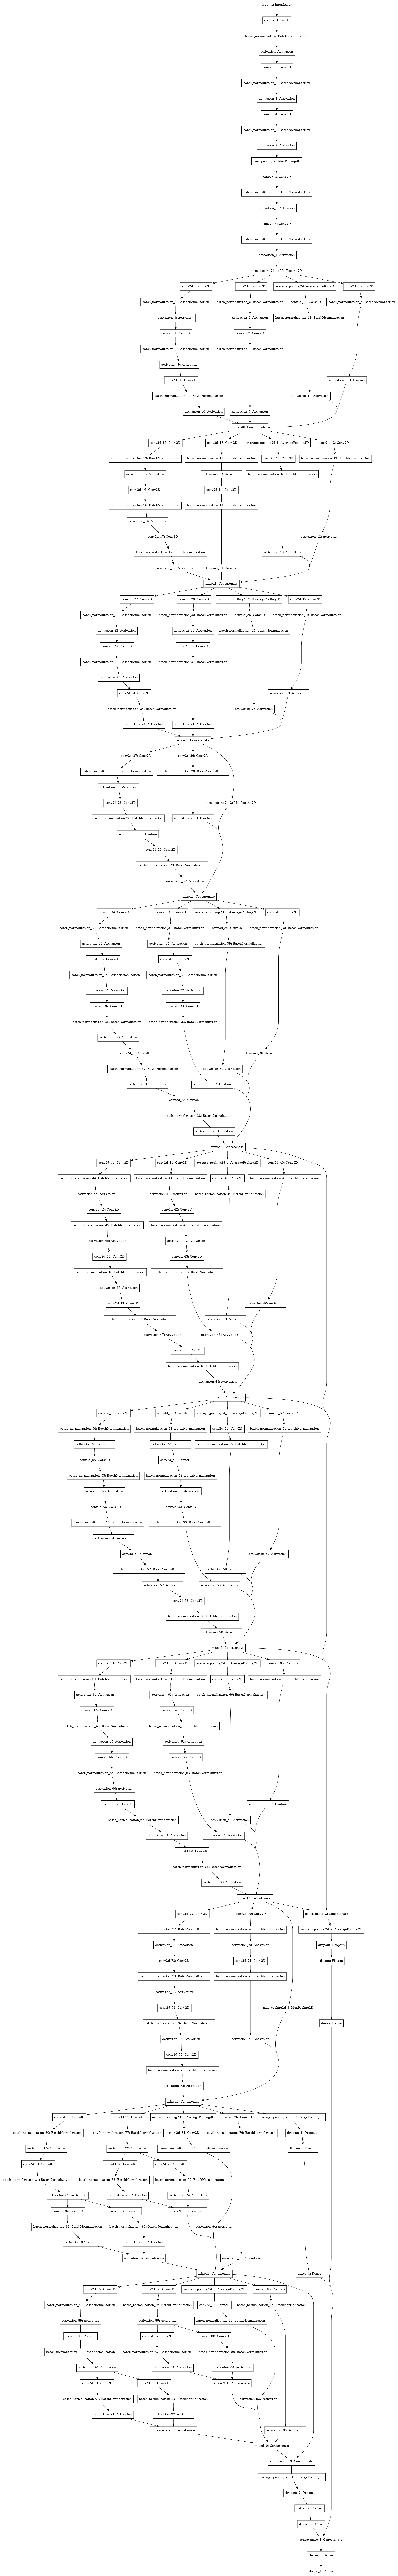

In [24]:
tf.keras.utils.plot_model(
model, to_file='model.png', show_shapes=False, show_dtype=False,
     show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96,
     layer_range=None
)

## SEGMENTATION MODEL

In [25]:
brain_df = pd.read_excel("../input/indexing/indexing.xlsx")
brain_df_mask = brain_df[brain_df['mask'] == 1]
brain_df_mask.shape

(411, 6)

## TRAIN AND TEST SPLIT

In [26]:
# creating test, train and val sets
X_train, X_val = train_test_split(brain_df_mask, test_size=0.15)
X_test, X_val = train_test_split(X_val, test_size=0.5)
print("Train size is {}, valid size is {} & test size is {}".format(len(X_train), len(X_val), len(X_test)))

train_ids = list(X_train.image_path)
train_mask = list(X_train.mask_path)

val_ids = list(X_val.image_path)
val_mask= list(X_val.mask_path)

Train size is 349, valid size is 31 & test size is 31


In [27]:
class DataGenerator(tf.keras.utils.Sequence):
  def __init__(self, ids , mask, image_dir = './', batch_size = 16, img_h = 128, img_w = 128, shuffle = True):

    self.ids = ids
    self.mask = mask
    self.image_dir = image_dir
    self.batch_size = batch_size
    self.img_h = img_h
    self.img_w = img_w
    self.shuffle = shuffle
    self.on_epoch_end()

  def __len__(self):
    'Get the number of batches per epoch'

    return int(np.floor(len(self.ids)) / self.batch_size)

  def __getitem__(self, index):
    'Generate a batch of data'

    #generate index of batch_size length
    indexes = self.indexes[index* self.batch_size : (index+1) * self.batch_size]

    #get the ImageId corresponding to the indexes created above based on batch size
    list_ids = [self.ids[i] for i in indexes]

    #get the MaskId corresponding to the indexes created above based on batch size
    list_mask = [self.mask[i] for i in indexes]


    #generate data for the X(features) and y(label)
    X, y = self.__data_generation(list_ids, list_mask)

    #returning the data
    return X, y

  def on_epoch_end(self):
    'Used for updating the indices after each epoch, once at the beginning as well as at the end of each epoch'
    
    #getting the array of indices based on the input dataframe
    self.indexes = np.arange(len(self.ids))

    #if shuffle is true, shuffle the indices
    if self.shuffle:
      np.random.shuffle(self.indexes)

  def __data_generation(self, list_ids, list_mask):
    'generate the data corresponding the indexes in a given batch of images'

    # create empty arrays of shape (batch_size,height,width,depth) 
    #Depth is 3 for input and depth is taken as 1 for output becasue mask consist only of 1 channel.
    X = np.empty((self.batch_size, self.img_h, self.img_w, 3))
    y = np.empty((self.batch_size, self.img_h, self.img_w, 1))

    #iterate through the dataframe rows, whose size is equal to the batch_size
    for i in range(len(list_ids)):
      #path of the image
      img_path = str(list_ids[i])
      
      #mask path
      mask_path = str(list_mask[i])
      
      #reading the original image and the corresponding mask image
      img = io.imread(img_path)
      mask = io.imread(mask_path)

      #resizing and coverting them to array of type float64
      img = cv2.resize(img,(self.img_h,self.img_w))
      img = np.array(img, dtype = np.float64)
      
      mask = cv2.resize(mask,(self.img_h,self.img_w))
      mask = np.array(mask, dtype = np.float64)

      #standardising 
      img -= img.mean()
      img /= img.std()
    
      mask -= mask.mean()
      mask /= mask.std()
      
      #Adding image to the empty array
      X[i,] = img
      
      y[i,] = np.expand_dims(mask, axis = 2)
    
 
    y = (y > 0).astype(int)

    return X, y

train_data = DataGenerator(train_ids, train_mask)
val_data = DataGenerator(val_ids, val_mask)

## MODEL CONSTRUCTION

In [28]:
# lets create model now
def resblock(X, f):
    '''
    function for creating res block
    '''
    X_copy = X  #copy of input
    
    # main path
    X = Conv2D(f, kernel_size=(1,1), kernel_initializer='he_normal')(X)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)
    
    X = Conv2D(f, kernel_size=(3,3), padding='same', kernel_initializer='he_normal')(X)
    X = BatchNormalization()(X)
    
    # shortcut path
    X_copy = Conv2D(f, kernel_size=(1,1), kernel_initializer='he_normal')(X_copy)
    X_copy = BatchNormalization()(X_copy)
    
    # Adding the output from main path and short path together
    X = Add()([X, X_copy])
    X = Activation('relu')(X)
    
    return X

def upsample_concat(x, skip):
    '''
    funtion for upsampling image
    '''
    X = UpSampling2D((2,2))(x)
    merge = Concatenate()([X, skip])
    
    return merge

In [29]:
input_shape = (128,128,3)
X_input = Input(input_shape) #iniating tensor of input shape

# Stage 1
conv_1 = Conv2D(16, 3, activation='relu', padding='same', kernel_initializer='he_normal')(X_input)
conv_1 = BatchNormalization()(conv_1)
conv_1 = Conv2D(16, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv_1)
conv_1 = BatchNormalization()(conv_1)
pool_1 = MaxPool2D((2,2))(conv_1)

# stage 2
conv_2 = resblock(pool_1, 32)
pool_2 = MaxPool2D((2,2))(conv_2)

# Stage 3
conv_3 = resblock(pool_2, 64)
pool_3 = MaxPool2D((2,2))(conv_3)

# Stage 4
conv_4 = resblock(pool_3, 128)
pool_4 = MaxPool2D((2,2))(conv_4)

# Stage 5 (bottle neck)
conv_5 = resblock(pool_4, 256)

# Upsample Stage 1
up_1 = upsample_concat(conv_5, conv_4)
up_1 = resblock(up_1, 128)

# Upsample Stage 2
up_2 = upsample_concat(up_1, conv_3)
up_2 = resblock(up_2, 64)

# Upsample Stage 3
up_3 = upsample_concat(up_2, conv_2)
up_3 = resblock(up_3, 32)

# Upsample Stage 4
up_4 = upsample_concat(up_3, conv_1)
up_4 = resblock(up_4, 16)

# final output
out = Conv2D(1, (1,1), kernel_initializer='he_normal', padding='same', activation='sigmoid')(up_4)

seg_model = Model(X_input, out)
#seg_model.summary()

## MODEL COMPILATION AND FITTING

In [30]:
from keras.losses import binary_crossentropy

epsilon = 1e-5
smooth = 1

def tversky(y_true, y_pred):
    y_true_pos = K.flatten(y_true)
    y_pred_pos = K.flatten(y_pred)
    true_pos = K.sum(y_true_pos * y_pred_pos)
    false_neg = K.sum(y_true_pos * (1-y_pred_pos))
    false_pos = K.sum((1-y_true_pos)*y_pred_pos)
    alpha = 0.7
    return (true_pos + smooth)/(true_pos + alpha*false_neg + (1-alpha)*false_pos + smooth)

def focal_tversky(y_true,y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    
    pt_1 = tversky(y_true, y_pred)
    gamma = 0.75
    return K.pow((1-pt_1), gamma)

def tversky_loss(y_true, y_pred):
    return 1 - tversky(y_true,y_pred)

In [31]:
# compling model and callbacks functions
adam = tf.keras.optimizers.Adam(lr = 0.05, epsilon = 0.1)
seg_model.compile(optimizer = adam, 
                  loss = focal_tversky, 
                  metrics = [tversky]
                 )
#callbacks
earlystopping = EarlyStopping(monitor='val_loss',
                              mode='min', 
                              verbose=1, 
                              patience=20
                             )
# save the best model with lower validation loss
checkpointer = ModelCheckpoint(filepath="ResUNet-segModel-weights.hdf5", 
                               verbose=1, 
                               save_best_only=True
                              )
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              mode='min',
                              verbose=1,
                              patience=10,
                              min_delta=0.0001,
                              factor=0.2
                             )

In [32]:
h = seg_model.fit(train_data, 
                  epochs = 60, 
                  validation_data = val_data,
                  callbacks = [checkpointer, earlystopping, reduce_lr]
                 )

Epoch 1/60
21/21 [==============================] - 8s 235ms/step - loss: 0.8910 - tversky: 0.1425 - val_loss: 0.9016 - val_tversky: 0.1290

Epoch 00001: val_loss improved from inf to 0.90156, saving model to ResUNet-segModel-weights.hdf5
Epoch 2/60
21/21 [==============================] - 2s 73ms/step - loss: 0.8524 - tversky: 0.1916 - val_loss: 0.8972 - val_tversky: 0.1347

Epoch 00002: val_loss improved from 0.90156 to 0.89717, saving model to ResUNet-segModel-weights.hdf5
Epoch 3/60
21/21 [==============================] - 1s 56ms/step - loss: 0.8248 - tversky: 0.2263 - val_loss: 0.8649 - val_tversky: 0.1760

Epoch 00003: val_loss improved from 0.89717 to 0.86487, saving model to ResUNet-segModel-weights.hdf5
Epoch 4/60
21/21 [==============================] - 1s 57ms/step - loss: 0.7922 - tversky: 0.2666 - val_loss: 0.7983 - val_tversky: 0.2595

Epoch 00004: val_loss improved from 0.86487 to 0.79829, saving model to ResUNet-segModel-weights.hdf5
Epoch 5/60
21/21 [=================

In [33]:
h.history.keys()

dict_keys(['loss', 'tversky', 'val_loss', 'val_tversky', 'lr'])

## MODEL ANALYSIS

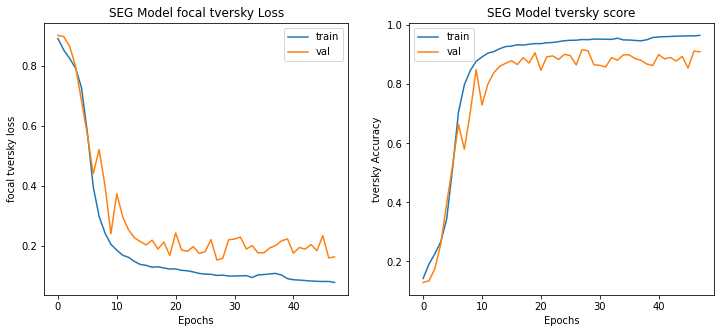

In [34]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(h.history['loss']);
plt.plot(h.history['val_loss']);
plt.title("SEG Model focal tversky Loss");
plt.ylabel("focal tversky loss");
plt.xlabel("Epochs");
plt.legend(['train', 'val']);

plt.subplot(1,2,2)
plt.plot(h.history['tversky']);
plt.plot(h.history['val_tversky']);
plt.title("SEG Model tversky score");
plt.ylabel("tversky Accuracy");
plt.xlabel("Epochs");
plt.legend(['train', 'val']);

In [35]:
test_ids = list(X_test.image_path)
test_mask = list(X_test.mask_path)
test_data = DataGenerator(test_ids, test_mask)
_, tv = seg_model.evaluate(test_data)
print("Segmentation tversky is {:.2f}%".format(tv*100))

1/1 [==============================] - 0s 79ms/step - loss: 0.1772 - tversky: 0.9004
Segmentation tversky is 90.04%


In [36]:
def prediction(test, model, model_seg):
    mask, image_id, has_mask = [], [], []  
    #itetrating through each image in test data
    for i in test.image_path:
        img = io.imread(i)
        #normalizing
        img = img *1./255.
        #reshaping
        img = cv2.resize(img, (128,128))
        # converting img into array
        img = np.array(img, dtype=np.float64)
        #reshaping the image from 256,256,3 to 1,256,256,3
        img = np.reshape(img, (1,128,128,3))
        #Creating a empty array of shape 1,256,256,1
        X = np.empty((1,128,128,3))
        # read the image
        img = io.imread(i)
        #resizing the image and coverting them to array of type float64
        img = cv2.resize(img, (128,128))
        img = np.array(img, dtype=np.float64)
        # standardising the image
        img -= img.mean()
        img /= img.std()
        #converting the shape of image from 256,256,3 to 1,256,256,3
        X[0,] = img
        predict = model_seg.predict(X)  
        image_id.append(i)
        has_mask.append(1)
        mask.append(predict)            
    return pd.DataFrame({'image_path': image_id,'predicted_mask': mask})

In [37]:
# making prediction
df_pred = prediction(brain_df_mask[80:100], model, seg_model)
df_pred 

image_path  \
0   ../input/lggsegmentationpreprocessed/kaggle_3m...   
1   ../input/lggsegmentationpreprocessed/kaggle_3m...   
2   ../input/lggsegmentationpreprocessed/kaggle_3m...   
3   ../input/lggsegmentationpreprocessed/kaggle_3m...   
4   ../input/lggsegmentationpreprocessed/kaggle_3m...   
5   ../input/lggsegmentationpreprocessed/kaggle_3m...   
6   ../input/lggsegmentationpreprocessed/kaggle_3m...   
7   ../input/lggsegmentationpreprocessed/kaggle_3m...   
8   ../input/lggsegmentationpreprocessed/kaggle_3m...   
9   ../input/lggsegmentationpreprocessed/kaggle_3m...   
10  ../input/lggsegmentationpreprocessed/kaggle_3m...   
11  ../input/lggsegmentationpreprocessed/kaggle_3m...   
12  ../input/lggsegmentationpreprocessed/kaggle_3m...   
13  ../input/lggsegmentationpreprocessed/kaggle_3m...   
14  ../input/lggsegmentationpreprocessed/kaggle_3m...   
15  ../input/lggsegmentationpreprocessed/kaggle_3m...   
16  ../input/lggsegmentationpreprocessed/kaggle_3m...   
17  ../input/lggsegmentationpreprocessed/kaggle_3m...   
18  ../input/lggsegmentationpreprocessed/kaggle_3m...   
19  ../input/lggsegmentationpreprocessed/kaggle_3m...   

                                       predicted_mask  
0   [[[[1.3150701e-06], [2.820749e-06], [1.5462432...  
1   [[[[1.3346372e-06], [2.5017953e-06], [1.042709...  
2   [[[[8.302032e-07], [1.5823514e-06], [1.036964e...  
3   [[[[1.2783225e-06], [2.8916725e-06], [1.000465...  
4   [[[[1.3074008e-06], [2.6653063e-06], [1.119382...  
5   [[[[8.0284e-07], [1.9893687e-06], [5.106716e-0...  
6   [[[[9.781792e-07], [1.7295761e-06], [8.380239e...  
7   [[[[6.428316e-07], [1.242392e-06], [4.993046e-...  
8   [[[[1.0937995e-06], [2.1967337e-06], [8.31022e...  
9   [[[[1.0669689e-06], [2.1020376e-06], [6.894971...  
10  [[[[8.9525525e-07], [1.963945e-06], [6.733819e...  
11  [[[[8.1598705e-07], [2.0352343e-06], [5.622997...  
12  [[[[8.2679384e-07], [1.986574e-06], [5.6945273...  
13  [[[[1.029675e-06], [1.948037e-06], [9.007019e-...  
14  [[[[7.910447e-07], [2.0136558e-06], [5.256879e...  
15  [[[[1.4152828e-06], [2.759022e-06], [1.0945104...  
16  [[[[9.728288e-07], [2.037808e-06], [1.5611342e...  
17  [[[[1.1174394e-06], [2.3373002e-06], [7.472320...  
18  [[[[1.1596481e-06], [2.4163237e-06], [7.842887...  
19  [[[[8.330345e-07], [1.9009157e-06], [4.3976893...

In [38]:
df_pred = brain_df_mask[80:100].merge(df_pred, on='image_path')
df_pred.head(10)

Unnamed: 0             patient_id  \
0        2085  TCGA_FG_7637_20000922   
1        2098  TCGA_CS_5397_20010315   
2        2105  TCGA_CS_5397_20010315   
3        2106  TCGA_CS_5397_20010315   
4        2113  TCGA_CS_5397_20010315   
5        2123  TCGA_CS_4941_19960909   
6        2127  TCGA_CS_4941_19960909   
7        2135  TCGA_CS_4941_19960909   
8        2139  TCGA_CS_4941_19960909   
9        2143  TCGA_HT_7874_19950902   

                                          image_path  \
0  ../input/lggsegmentationpreprocessed/kaggle_3m...   
1  ../input/lggsegmentationpreprocessed/kaggle_3m...   
2  ../input/lggsegmentationpreprocessed/kaggle_3m...   
3  ../input/lggsegmentationpreprocessed/kaggle_3m...   
4  ../input/lggsegmentationpreprocessed/kaggle_3m...   
5  ../input/lggsegmentationpreprocessed/kaggle_3m...   
6  ../input/lggsegmentationpreprocessed/kaggle_3m...   
7  ../input/lggsegmentationpreprocessed/kaggle_3m...   
8  ../input/lggsegmentationpreprocessed/kaggle_3m...   
9  ../input/lggsegmentationpreprocessed/kaggle_3m...   

                                           mask_path  mask        tumor_type  \
0  ../input/lggsegmentationpreprocessed/kaggle_3m...     1  meningioma_tumor   
1  ../input/lggsegmentationpreprocessed/kaggle_3m...     1      glioma_tumor   
2  ../input/lggsegmentationpreprocessed/kaggle_3m...     1      glioma_tumor   
3  ../input/lggsegmentationpreprocessed/kaggle_3m...     1      glioma_tumor   
4  ../input/lggsegmentationpreprocessed/kaggle_3m...     1  meningioma_tumor   
5  ../input/lggsegmentationpreprocessed/kaggle_3m...     1      glioma_tumor   
6  ../input/lggsegmentationpreprocessed/kaggle_3m...     1      glioma_tumor   
7  ../input/lggsegmentationpreprocessed/kaggle_3m...     1  meningioma_tumor   
8  ../input/lggsegmentationpreprocessed/kaggle_3m...     1      glioma_tumor   
9  ../input/lggsegmentationpreprocessed/kaggle_3m...     1      glioma_tumor   

                                      predicted_mask  
0  [[[[1.3150701e-06], [2.820749e-06], [1.5462432...  
1  [[[[1.3346372e-06], [2.5017953e-06], [1.042709...  
2  [[[[8.302032e-07], [1.5823514e-06], [1.036964e...  
3  [[[[1.2783225e-06], [2.8916725e-06], [1.000465...  
4  [[[[1.3074008e-06], [2.6653063e-06], [1.119382...  
5  [[[[8.0284e-07], [1.9893687e-06], [5.106716e-0...  
6  [[[[9.781792e-07], [1.7295761e-06], [8.380239e...  
7  [[[[6.428316e-07], [1.242392e-06], [4.993046e-...  
8  [[[[1.0937995e-06], [2.1967337e-06], [8.31022e...  
9  [[[[1.0669689e-06], [2.1020376e-06], [6.894971...

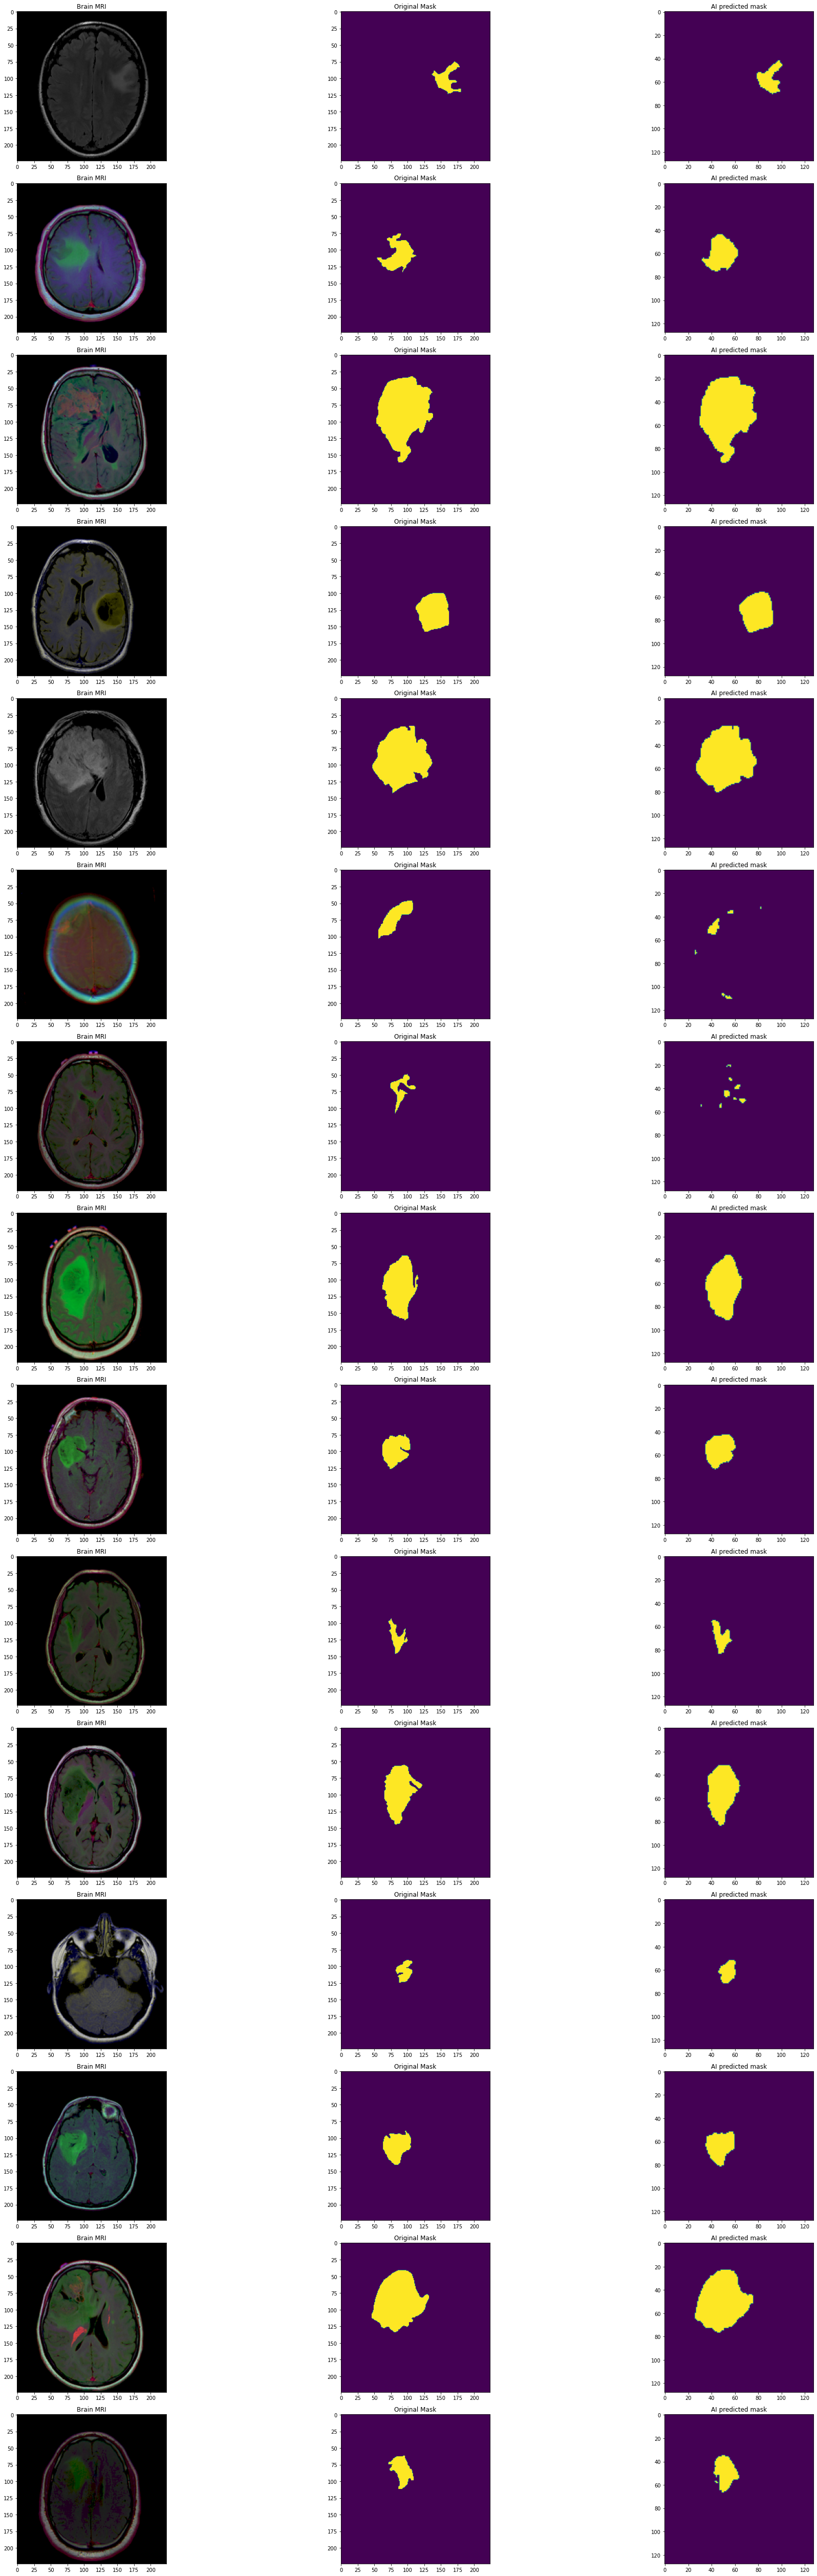

In [39]:
count = 0
fig, axs = plt.subplots(15,3, figsize=(30,70))

for i in range(len(df_pred)):
    if count<15:
        #read mri images
        img = io.imread(df_pred.image_path[i])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axs[count][0].imshow(img)
        axs[count][0].title.set_text('Brain MRI')
        
        #read original mask
        mask = io.imread(df_pred.mask_path[i])
        axs[count][1].imshow(mask)
        axs[count][1].title.set_text('Original Mask')
        
        #read predicted mask
        pred = np.array(df_pred.predicted_mask[i]).squeeze().round()
        axs[count][2].imshow(pred)
        axs[count][2].title.set_text('AI predicted mask')
        
        count +=1
    if (count==15):
        break

fig.tight_layout() 